In [1]:
!which python

/home/asa/miniconda3/envs/TensorFlow-Development/bin/python


## Extracting from the PDF

In [7]:
# Importing the neccessary packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer
import fitz
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
from io import BytesIO
import IPython.display as display
import numpy as np
import pandas as pd
from transformers import pipeline
import speech_recognition as sr
from pydub import AudioSegment
import time

In [2]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [55]:
# Neccessar functions

# Preprocessing the Images
def preprocess_image(img_bytes):
    img = Image.open(BytesIO(img_bytes))
    img = img.convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    return img_array

# Extracting the images
def extract_images_from_pdf(pdf_path):
    pdf_document = fitz.open(pdf_path)
    images = []
    
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        image_list = page.get_images(full=True)

        for img_index, img in enumerate(image_list):
            xref = img[0]
            base_image = pdf_document.extract_image(xref)
            image_bytes = base_image["image"]
            images.append(image_bytes)

    return images

# Display the images
def display_images(images):
    for i, img_bytes in enumerate(images):
        img = Image.open(BytesIO(img_bytes))
        display.display(img)

# Display the preprocessed the images
def display_preprocessed_images(images):
    for i, img_bytes in enumerate(images):
        preprocessed_img = preprocess_image(img_bytes)
        display.display(Image.fromarray((preprocessed_img * 255).astype('uint8')))

# Extract the text from the pdf
def extract_text_from_pdf(pdf_path):
    text = ""
    pdf_document = fitz.open(pdf_path)
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        text += page.get_text("text")
    return text

# Preprocessing the pdf text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and removing non-alphabetic tokens
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Removing stopwords
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    
    return ' '.join(filtered_words)

# Tokenizer
def tokenize_and_pad_text(text, max_len=10000):
    tokenizer = Tokenizer(num_words=10000000)
    tokenizer.fit_on_texts([text])
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    return padded_sequences


In [56]:
pdf_path = "./Git_tutorial.pdf"
pdf_text = extract_text_from_pdf(pdf_path)
images = extract_images_from_pdf(pdf_path)

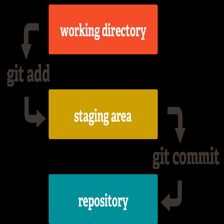

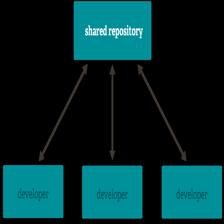

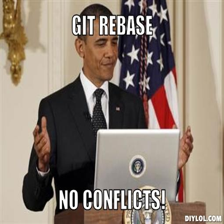

In [57]:
display_preprocessed_images(images)

In [58]:
print(pdf_text)

Combine work of multiple collaborators
Understand changes
Support incremental development
Compare and revert to earlier versions
Backup
Parallel versions
Document development (for other developers and yourself, not for users)
→ version control is awesome. Use it all the time.
A distributed version control system (VCS) whose primary user interface is the Unix command line. It
basically keeps a "non-human-readable" database of the ﬁles you put under version control ("track") and
provides commands to access and update that database.
Graphical user interfaces, integration in Integrated Design Environments, and web platforms
GitHub/GitLab/… have formed around the Git core software.
The aim here is not to tell you every single Git command in existence or even to teach you all the
functionality. The aim is to familiarise you with the principles of version control, some good practices, and
get you started on the practical matters.
We're going to walk you through an example. The things we show 

In [59]:
process_pdf_text = preprocess_text(pdf_text)
tokenize_and_pad_text(process_pdf_text)

array([[  0,   0,   0, ..., 330, 331, 332]], dtype=int32)

## Get the content from the images

In [62]:
!pip install transformers
!pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 257.3 kB/s eta 0:00:00 kB/s eta 0:00:01


In [3]:
captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

tf_model.h5:  16%|#5        | 157M/990M [00:00<?, ?B/s]

I0000 00:00:1723699382.837692   33472 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723699382.952144   33472 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723699382.953567   33472 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723699382.956253   33472 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/home/asa/miniconda3/envs/TensorFlow-Development/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [4]:
captioner('./sample.jpeg')

/home/asa/miniconda3/envs/TensorFlow-Development/lib/python3.10/site-packages/transformers/generation/tf_utils.py:837: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length.  recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'a girl in a hoodie with a hoodie on her head'}]

## Extract the text from the audio

In [5]:
!pip install SpeechRecognition pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01


## Implementation with LLava model

In [6]:
!pip install ollama
!pip install langchain-ollama
!pip install langchain-community

In [12]:
# Importing the packages
import subprocess
import requests
import time
import json
import base64
import ollama
import base64
from io import BytesIO
from IPython.display import HTML, display
from PIL import Image
from langchain_community.llms import Ollama
from langchain_ollama import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate

In [13]:
# Starting the llava server
def start_it_man():
    try:
        subprocess.Popen(["ollama", "run", "llava:7b"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        print("Starting the Ollama server with LLaVa...")
        time.sleep(5)
    except FileNotFoundError:
        print("Error: Ollama is not installed or not in the PATH.")
        exit(1)

# Converting the immage to base64
def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

# Display the image
def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


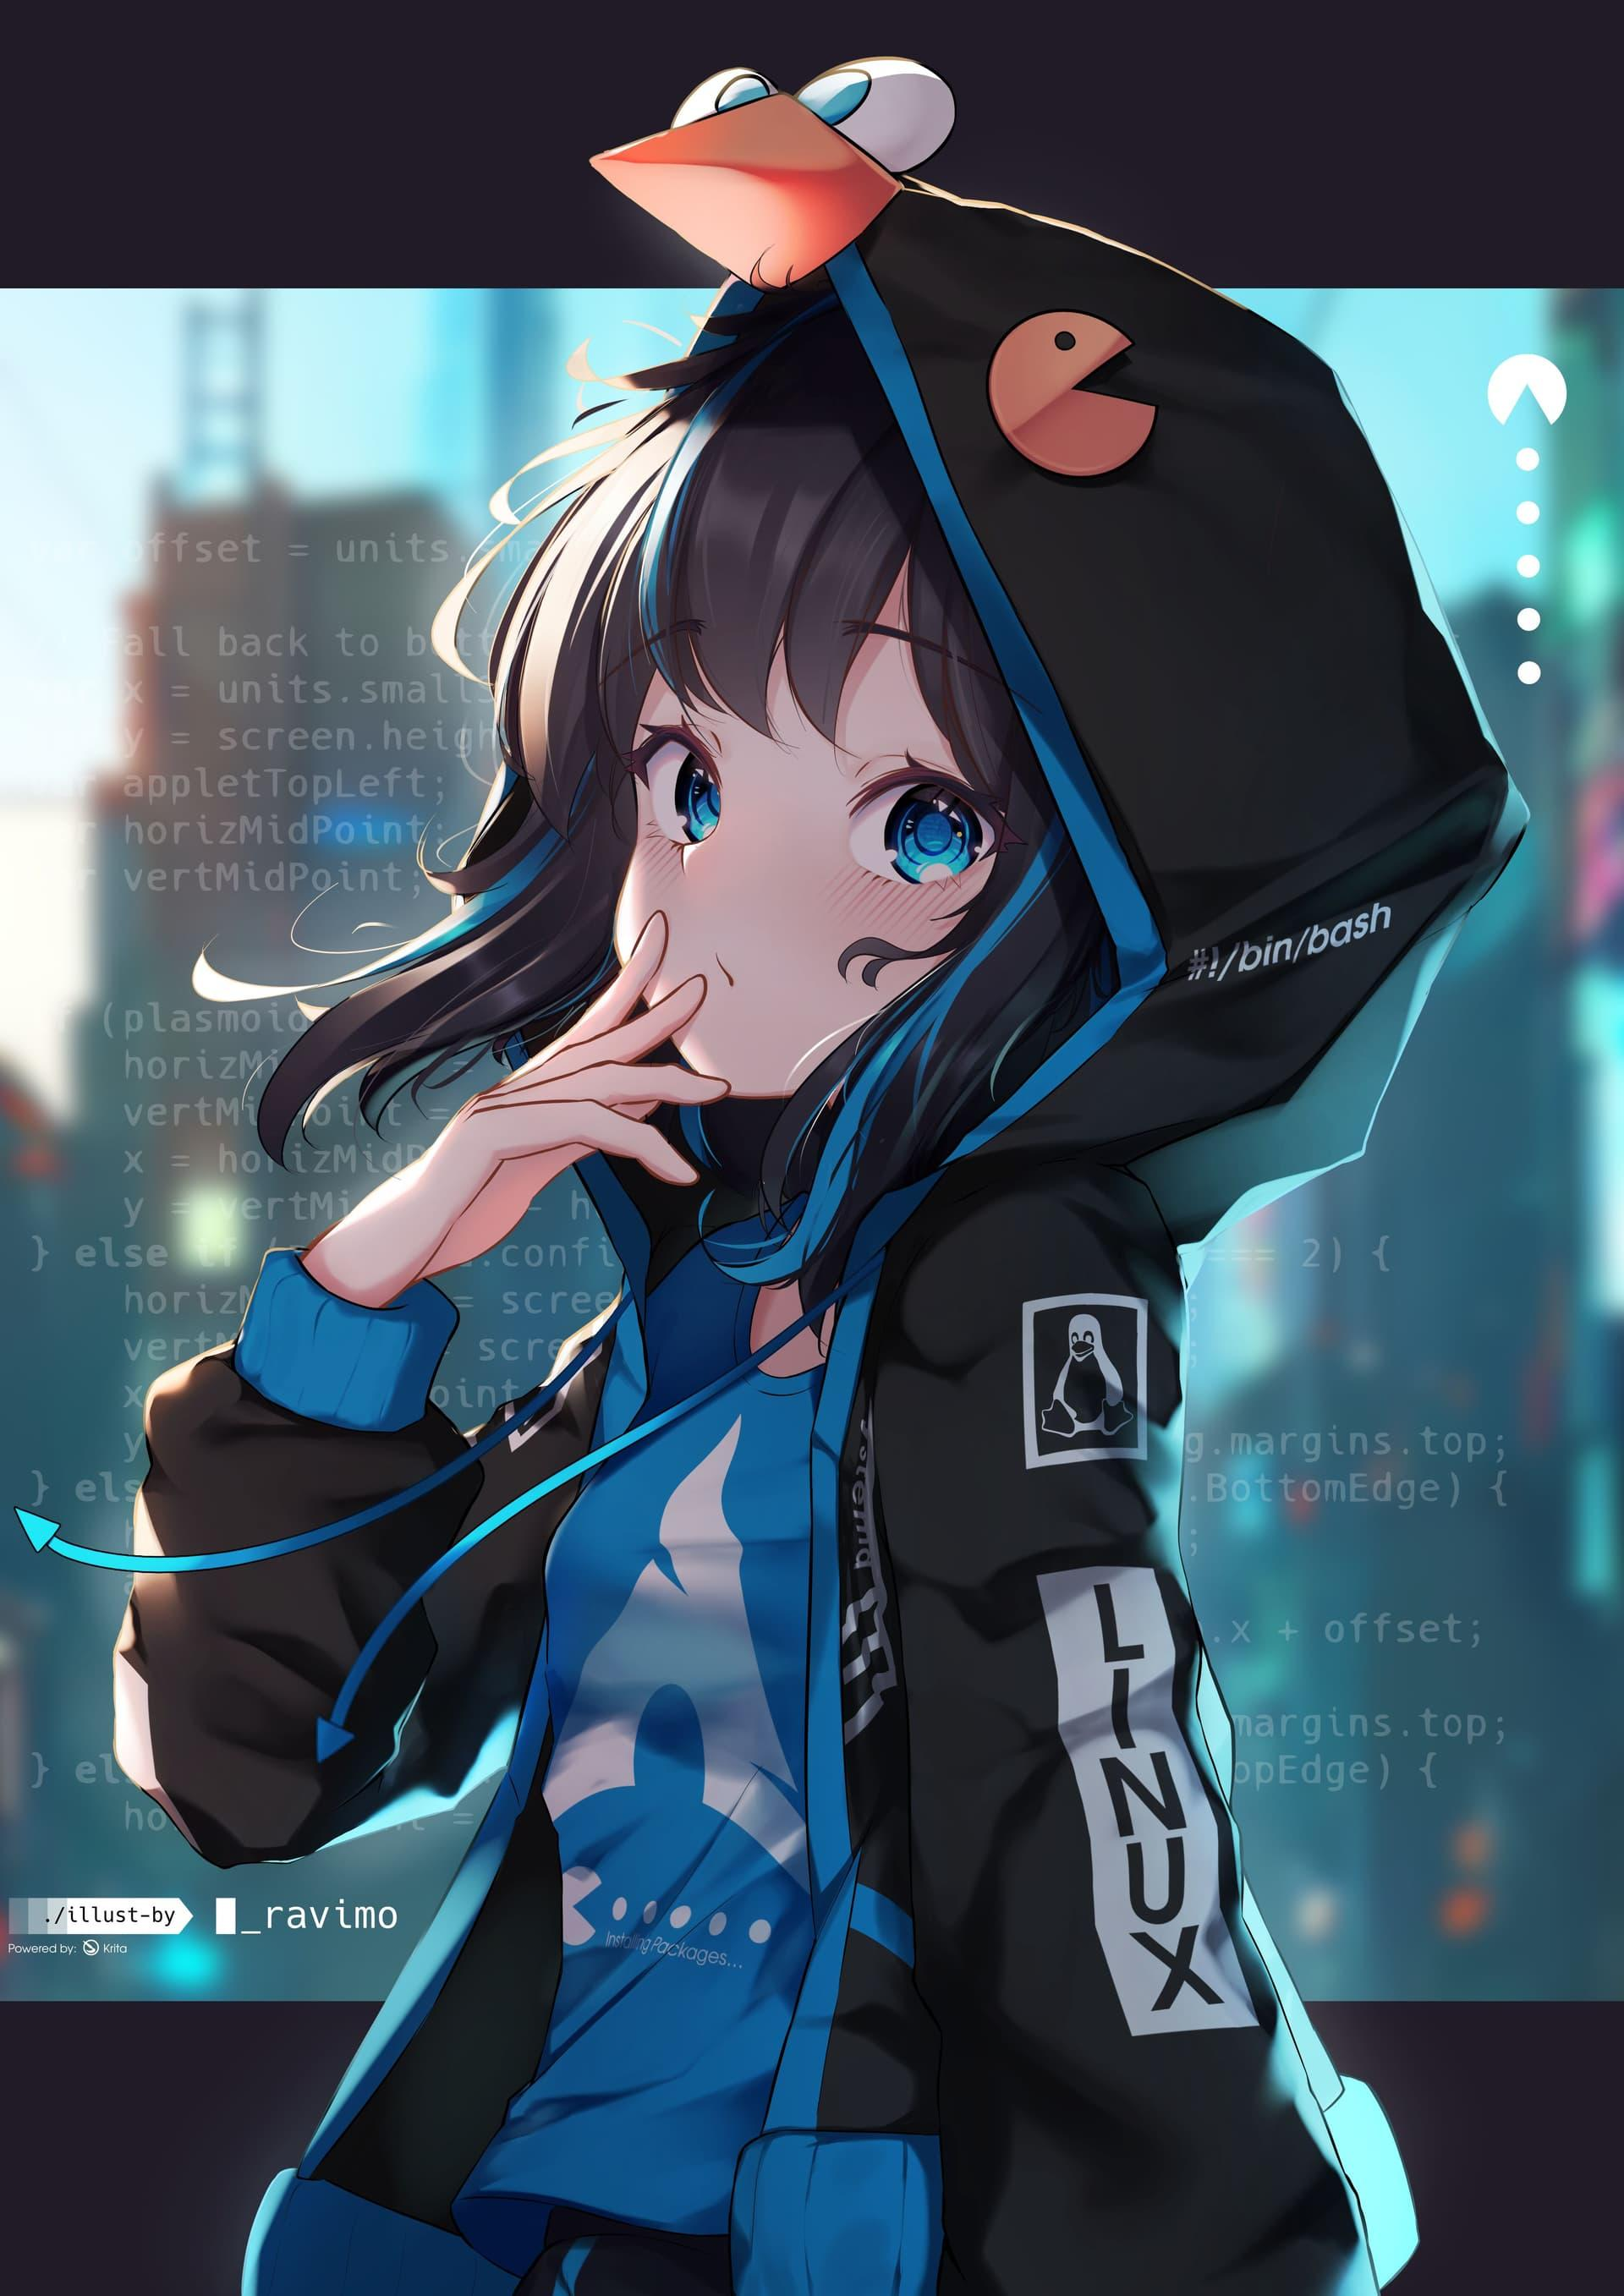

In [14]:
file_path = "./sample.jpeg"
pil_img = Image.open(file_path)
img_base64 = convert_to_base64(pil_image=pil_img)
plt_img_base64(img_base64=img_base64)

In [15]:
llm = Ollama(base_url="http://localhost:11434", model="llava:7b")

In [5]:
llm = OllamaLLM(model="llava:7b")
llm_with_image_context = llm.bind(images=[])
llm_with_image_context = llm.bind(images=[image_b64])
llm_with_image_context.invoke("What is the dollar based gross retention rate:")